In [6]:
import pandas as pd
import umap
import numpy as np
import copy
import joblib
import warnings
warnings.simplefilter("ignore")

In [9]:
from data.ccplots import *
from data.GTplot import *

In [7]:
from collections import Counter
from matplotlib.colors import ListedColormap,from_levels_and_colors
import matplotlib
from matplotlib.patches import Patch

In [11]:
import matplotlib.pyplot as plt
from PIL import Image,ImageChops,ImageDraw
from matplotlib.pyplot import imshow
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

In [12]:
data_dir = r'./bki'  
num =40
base=22
pca_comp=8
topk=20000
SMTH=1
pixel=1004*1344
dtype='uint64'
pidx=1
ftr_str=[f"{ii}" for ii in range(pca_comp)]
ftr=list(range(pca_comp))

In [13]:
PRETRAIN='./data/cancer_data/pretrain/RF/n8'

In [14]:
HH_pd=pd.read_csv(f'{PRETRAIN}/HH_pd_b{base}.csv')
HH_pdh=pd.read_csv(f'{PRETRAIN}/HH_pdh_b{base}.csv')

In [2]:
import sys
sys.path.insert(0,'/home/swei20/cancerHH/AceCanZ/code/')

In [3]:
import getpass
from code.SciServer import Authentication, CasJobs

In [4]:
username = 'viskawei'
password = getpass.getpass()
sciserver_token = Authentication.login(username, password)
sciserver_token

········


'3e5089c531dd44f4836c326f55aa9af2'

In [ ]:
HH_pdh

# Masks

In [101]:
# maskall=np.loadtxt(f'{PRETRAIN}/mask_all.txt')
maskall=maskall.reshape((num,1004,1344)).astype(bool)
pidx=26
# plt.matshow(maskall[pidx])

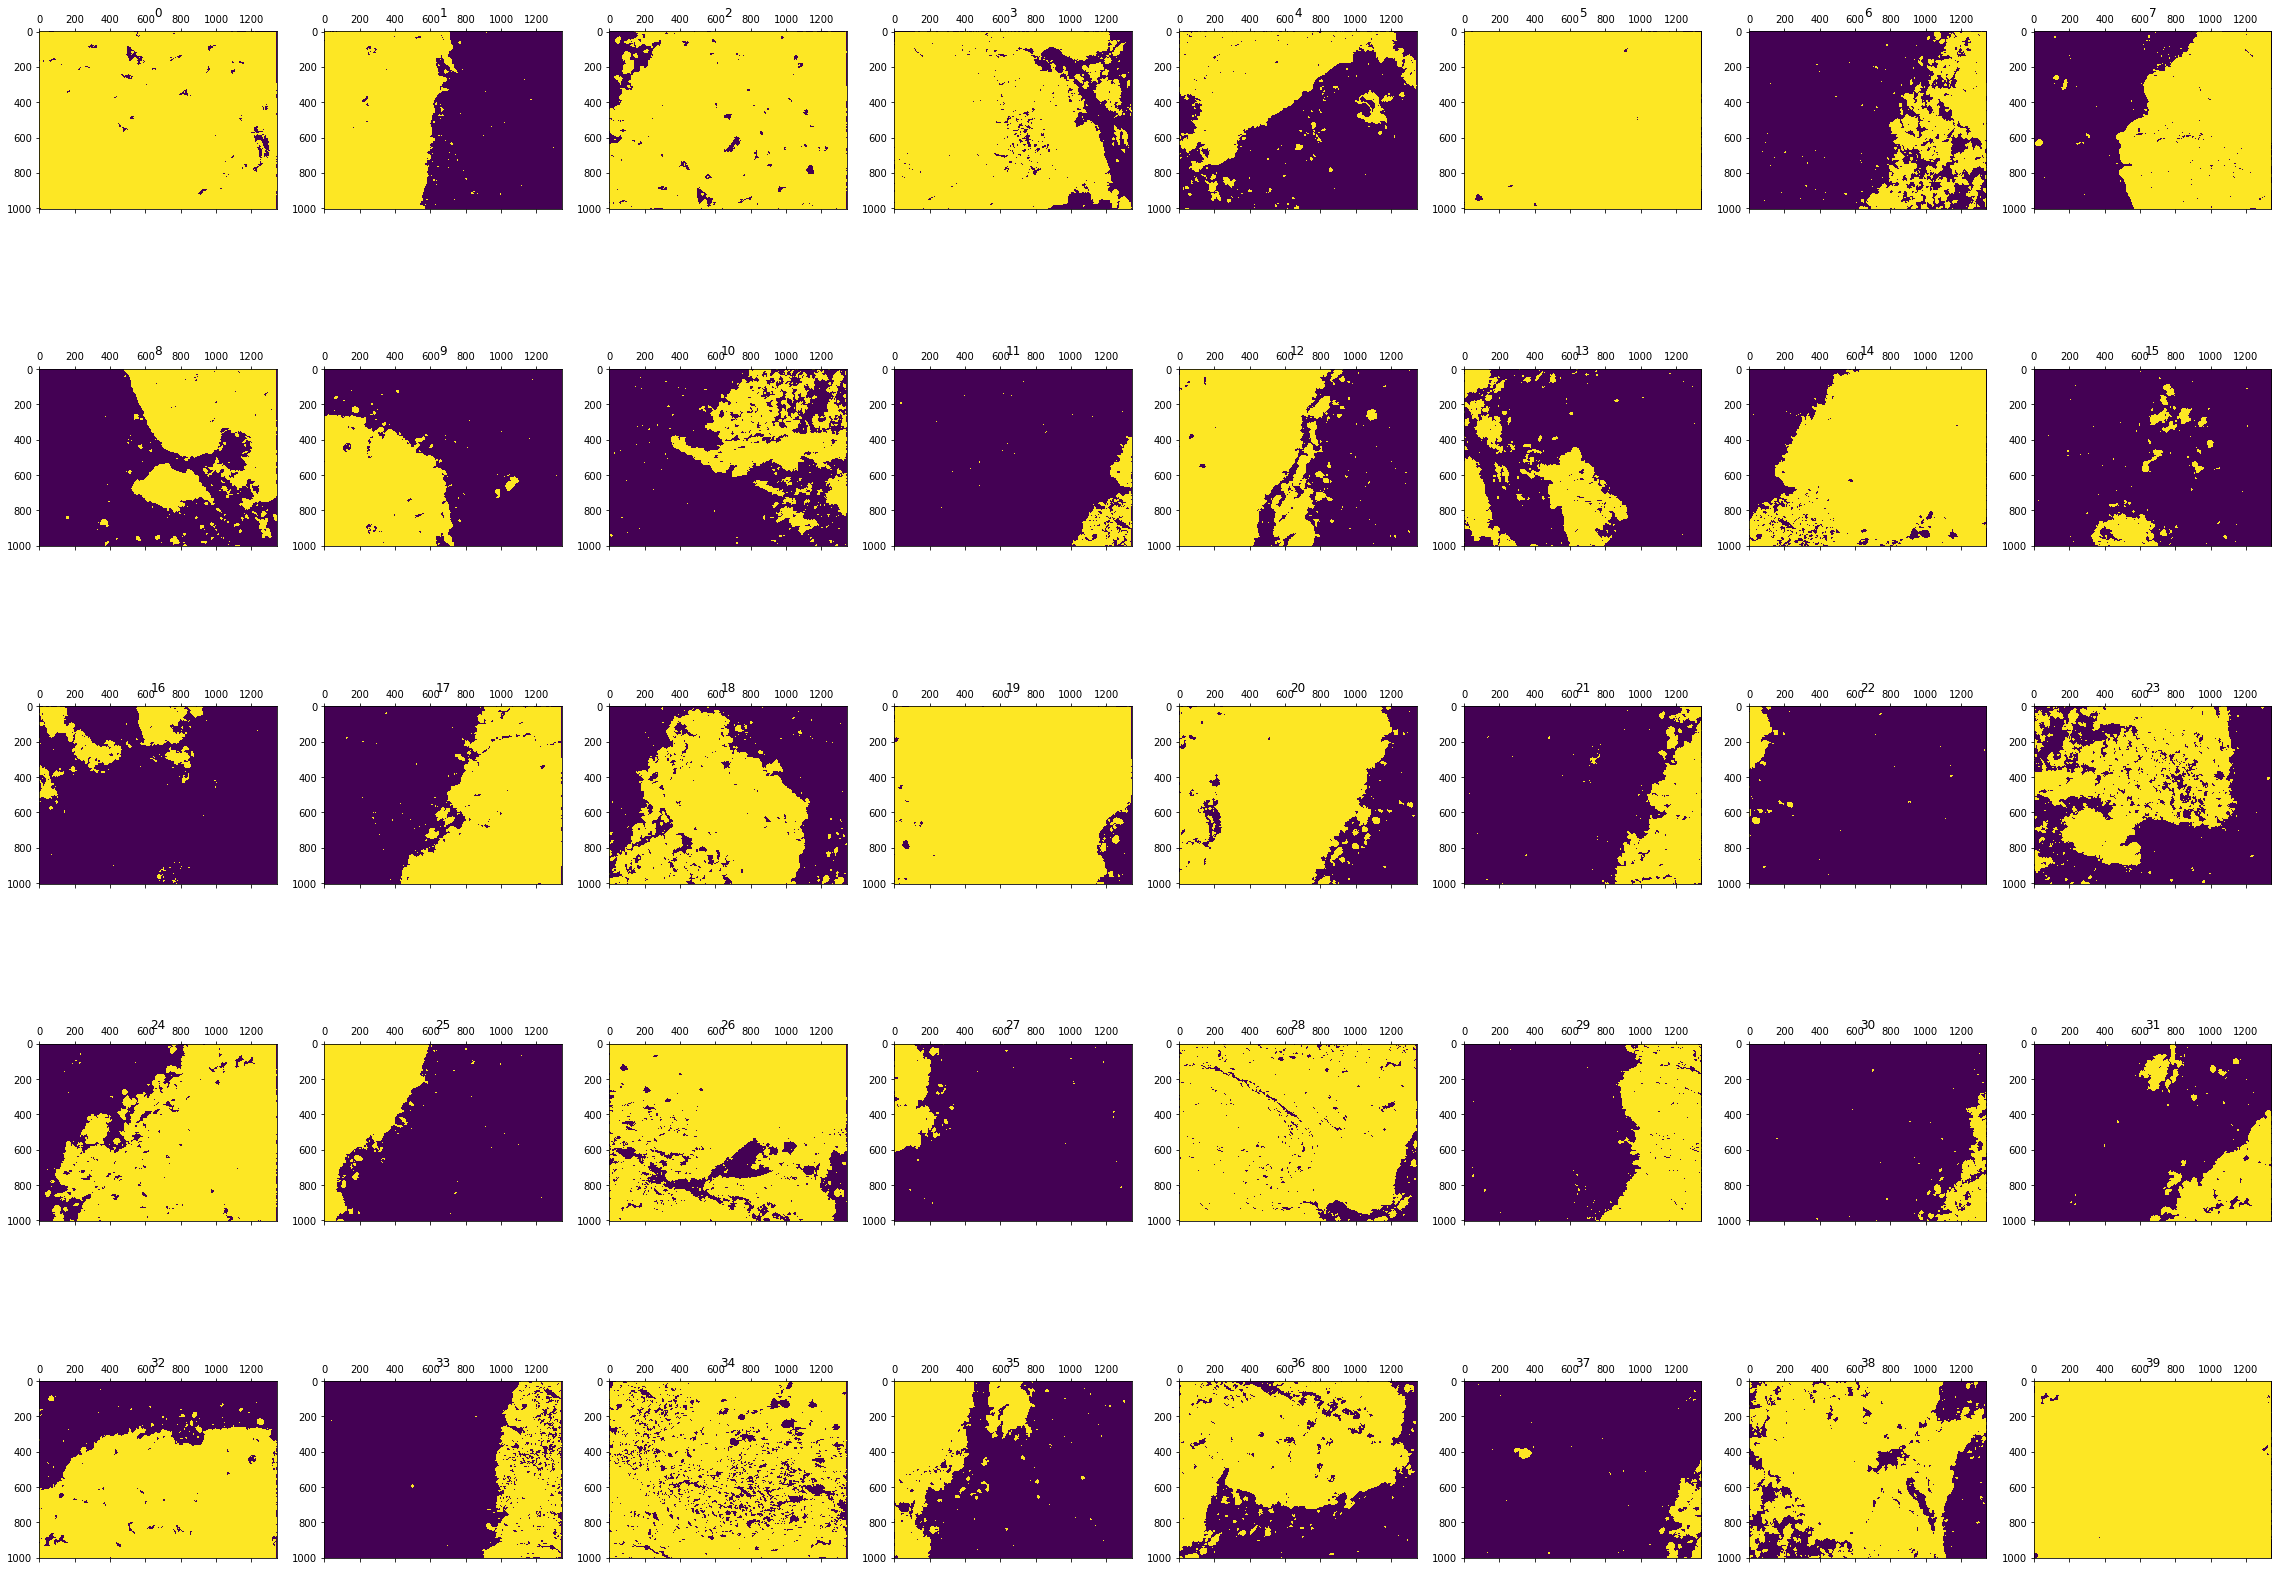

In [79]:
f, axs = plt.subplots(5,8,figsize=(40,30))
for ii, ax in enumerate(axs.flatten()):
    ax.matshow(maskall[ii])
    ax.set_title(ii)

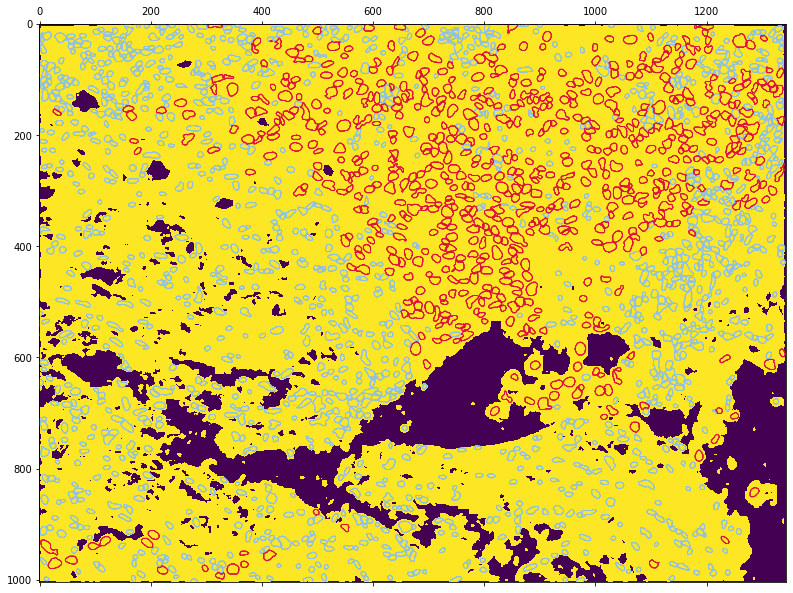

In [102]:
# mask26=np.loadtxt(f'{PRETRAIN}/mask{pidx}.txt')
mask26=maskall[pidx]
mask26_2=mask26.reshape((1004,1344))
plt.matshow(mask26_2)
plot_normal(ax=None,lbl=l64,c="#92c1e1",a=1)
plot_cancer(ax=None,lbl=l128,c='crimson',a=1)

In [103]:
idxii=int(maskall[:pidx].sum())
idxjj=int(maskall[:(pidx+1)].sum())
assert idxjj-idxii == mask26.sum()

# clustering

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [83]:
stream=np.loadtxt(f'{PRETRAIN}/stream_b{base}.txt')

In [94]:
stream26=stream[idxii:idxjj]

In [51]:
HH_pdh

0     1     2     3     4     5     6     7            HH      freq  \
0      4.0   4.0  14.0  14.0  14.0  14.0  14.0  14.0  3.658392e+10  204901.0   
1      3.0   5.0  14.0  14.0  14.0  14.0  14.0  14.0  3.658392e+10   93342.0   
2      3.0   5.0  13.0  14.0  14.0  14.0  14.0  14.0  3.658391e+10   86741.0   
3      3.0   5.0  13.0  15.0  14.0  14.0  14.0  14.0  3.658393e+10   72896.0   
4      4.0   4.0  14.0  15.0  14.0  14.0  14.0  14.0  3.658393e+10   70178.0   
...    ...   ...   ...   ...   ...   ...   ...   ...           ...       ...   
19995  4.0  17.0   5.0  18.0  15.0  13.0  14.0  14.0  3.657903e+10     180.0   
19996  0.0  15.0  12.0  13.0  14.0  14.0  15.0  16.0  4.168600e+10     180.0   
19997  0.0  17.0  14.0  12.0  14.0  13.0  14.0  15.0  3.907310e+10     180.0   
19998  0.0  14.0  10.0  14.0  15.0  13.0  15.0  14.0  3.669237e+10     180.0   
19999  2.0  20.0  13.0   9.0  15.0  15.0  14.0  14.0  3.658925e+10     180.0   

               rk        u1        u2  
0        204901.0  6.846065 -2.779557  
1        298243.0  6.736277 -2.577082  
2        384984.0  6.593040 -2.659927  
3        457880.0  6.671615 -2.704908  
4        528058.0  6.857128 -2.780334  
...           ...       ...       ...  
19995  21906693.0 -3.784924 -6.594922  
19996  21906873.0  2.217993  4.148291  
19997  21907053.0  1.352082  5.029498  
19998  21907233.0  2.735263  3.622136  
19999  21907413.0 -2.360953 -0.893627  

[20000 rows x 13 columns]

In [96]:
lw=HH_pdh['freq']/HH_pdh['freq'][0]

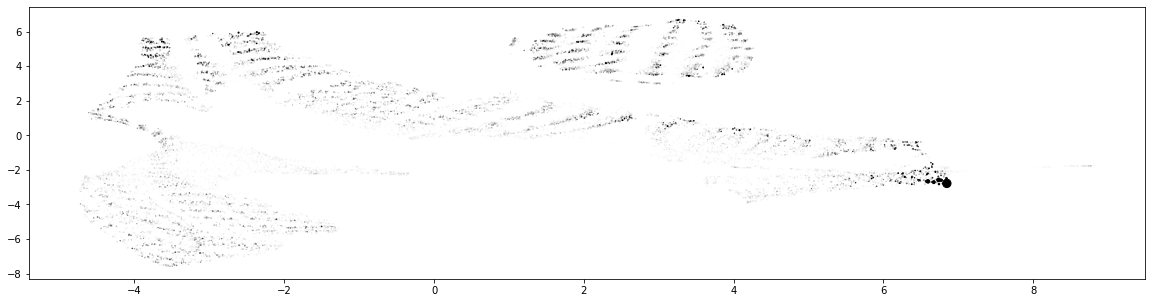

In [97]:
plt.figure(figsize=((20,5)))
plt.scatter(HH_pdh['u1'],HH_pdh['u2'],s=lw**2*70, c='k')

In [273]:
def get_kmean_lbl(exact_pdh,  N_cluster, u1 = 'u1', u2 = 'u2', k_cluster = 'kmean'):
    umap_result = exact_pdh.loc[:,[u1, u2 ]].values
    kmap = KMeans(n_clusters=N_cluster,n_init=30, algorithm='elkan',random_state=1178)
    kmap.fit(umap_result, sample_weight = None)
    exact_pdh[f'k{N_cluster}'] = kmap.labels_+1 
    return kmap

In [264]:
N_clusters=4

In [270]:
N_clusters

4

In [5]:
HH_pdh

NameError: name 'HH_pdh' is not defined

In [274]:
get_kmean_lbl(HH_pdh,  N_clusters)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=1178, tol=0.0001, verbose=0)

In [275]:
HH_pdh

0     1     2     3     4     5     6     7            HH      freq  \
0      4.0   4.0  14.0  14.0  14.0  14.0  14.0  14.0  3.658392e+10  204901.0   
1      3.0   5.0  14.0  14.0  14.0  14.0  14.0  14.0  3.658392e+10   93342.0   
2      3.0   5.0  13.0  14.0  14.0  14.0  14.0  14.0  3.658391e+10   86741.0   
3      3.0   5.0  13.0  15.0  14.0  14.0  14.0  14.0  3.658393e+10   72896.0   
4      4.0   4.0  14.0  15.0  14.0  14.0  14.0  14.0  3.658393e+10   70178.0   
...    ...   ...   ...   ...   ...   ...   ...   ...           ...       ...   
19995  4.0  17.0   5.0  18.0  15.0  13.0  14.0  14.0  3.657903e+10     180.0   
19996  0.0  15.0  12.0  13.0  14.0  14.0  15.0  16.0  4.168600e+10     180.0   
19997  0.0  17.0  14.0  12.0  14.0  13.0  14.0  15.0  3.907310e+10     180.0   
19998  0.0  14.0  10.0  14.0  15.0  13.0  15.0  14.0  3.669237e+10     180.0   
19999  2.0  20.0  13.0   9.0  15.0  15.0  14.0  14.0  3.658925e+10     180.0   

               rk        u1        u2  k6  k10  k7  k5  k4  
0        204901.0  6.846065 -2.779557   4    5   5   5   3  
1        298243.0  6.736277 -2.577082   4    5   5   5   3  
2        384984.0  6.593040 -2.659927   4    5   5   5   3  
3        457880.0  6.671615 -2.704908   4    5   5   5   3  
4        528058.0  6.857128 -2.780334   4    5   5   5   3  
...           ...       ...       ...  ..  ...  ..  ..  ..  
19995  21906693.0 -3.784924 -6.594922   1    6   7   2   1  
19996  21906873.0  2.217993  4.148291   2    8   1   4   2  
19997  21907053.0  1.352082  5.029498   2    1   1   4   2  
19998  21907233.0  2.735263  3.622136   2    8   1   4   2  
19999  21907413.0 -2.360953 -0.893627   5    2   3   2   1  

[20000 rows x 18 columns]

In [276]:
def process_kmean(exact_pdh,  N_clusters = [3,10], u1 = 'u1', u2 = 'u2', k_cluster = 'kmean', weight=None):
    k_names = []
    umap_result = exact_pdh.loc[:,[u1, u2 ]].values
    l_cluster = len(N_clusters)
    f, axes = plt.subplots(1,l_cluster,figsize= (16,5) )
    for i in range(l_cluster):
        N_cluster = N_clusters[i]
        k_name = f'k{N_cluster}'
        k_names += [k_name]
        kmeans = KMeans(n_clusters=N_cluster,n_init=30, algorithm='elkan')
        kmeans.fit(umap_result, sample_weight = weight)
        exact_pdh[k_name] = kmeans.labels_ 
        sns.scatterplot(
            x=u1, y=u2,
            hue= k_name , marker='x',s=5,
            palette=sns.color_palette("muted", N_cluster),
            data=exact_pdh,
            legend="full",
            ax = axes[i]
            # alpha=0.3 
            )
    # print(exact_pdh.loc[[0,1]])
    return k_names,kmeans


2


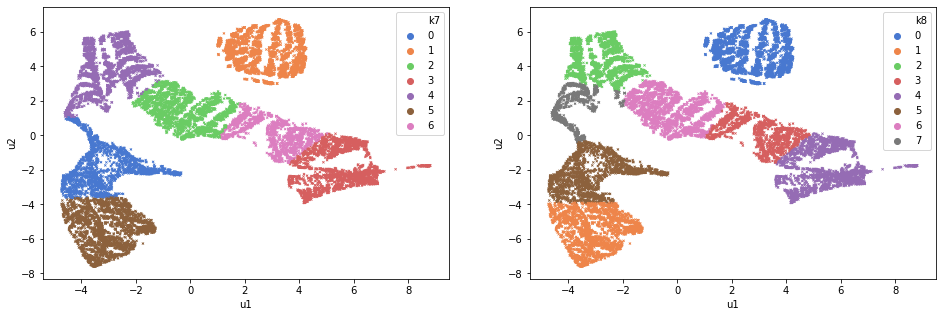

In [294]:
_=process_kmean(HH_pdh, N_clusters = [7,8], weight=None)

In [277]:
k_cluster

'k5'

In [295]:
k_cluster='k8'
pred_k8, _ =plot_clusters(stream26, mask26, HH_pdh,  k_cluster, val = 'HH', bg = 0, color = 0, sgn = 1 )
pred_k8=pred_k8.reshape((1004,1344))

In [302]:
k_cluster='k10'
pred_k10, _ =plot_clusters(stream26, mask26, HH_pdh,  k_cluster, val = 'HH', bg = 0, color = 0, sgn = 1 )
pred_k10=pred_k10.reshape((1004,1344))

In [158]:
k_cluster='k6'
pred_k6, _ =plot_clusters(stream26, mask26, HH_pdh,  k_cluster, val = 'HH', bg = 0, color = 0, sgn = 1 )
pred_k6=pred_k6.reshape((1004,1344))

In [241]:
k_cluster='k5'
pred_k5, _ =plot_clusters(stream26, mask26, HH_pdh,  k_cluster, val = 'HH', bg = 0, color = 0, sgn = 1 )
pred_k5=pred_k5.reshape((1004,1344))

In [303]:
np.savetxt(f'{PRETRAIN}/pred_k10.txt',pred_k10)

In [242]:
np.savetxt(f'{PRETRAIN}/pred_k5.txt',pred_k5)

In [296]:
N_cluster=8
cmap_k=sns.color_palette('muted', N_cluster)

In [253]:
def get_kmean_cluster_plot(HH_pdh,pred_k,N_cluster,cmap_k):
    f, (ax0,ax1)=plt.subplots(1,2,figsize=((16,5)))
    sns.scatterplot('u1','u2',data=HH_pdh,hue=f'k{N_cluster}', marker='x',s=5, palette=cmap_k,legend="full",ax = ax0)
    cmap, norm =from_levels_and_colors(list(range(N_cluster+2)),[[0.95,0.95,0.95,1]]+cmap_k)
    im=ax1.imshow(pred_k, cmap=cmap, norm=norm)
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax)

In [283]:
HH_pd['freq'].sum()

26034006.0

In [281]:
HH_pdh

0     1     2     3     4     5     6     7            HH      freq  \
0      4.0   4.0  14.0  14.0  14.0  14.0  14.0  14.0  3.658392e+10  204901.0   
1      3.0   5.0  14.0  14.0  14.0  14.0  14.0  14.0  3.658392e+10   93342.0   
2      3.0   5.0  13.0  14.0  14.0  14.0  14.0  14.0  3.658391e+10   86741.0   
3      3.0   5.0  13.0  15.0  14.0  14.0  14.0  14.0  3.658393e+10   72896.0   
4      4.0   4.0  14.0  15.0  14.0  14.0  14.0  14.0  3.658393e+10   70178.0   
...    ...   ...   ...   ...   ...   ...   ...   ...           ...       ...   
19995  4.0  17.0   5.0  18.0  15.0  13.0  14.0  14.0  3.657903e+10     180.0   
19996  0.0  15.0  12.0  13.0  14.0  14.0  15.0  16.0  4.168600e+10     180.0   
19997  0.0  17.0  14.0  12.0  14.0  13.0  14.0  15.0  3.907310e+10     180.0   
19998  0.0  14.0  10.0  14.0  15.0  13.0  15.0  14.0  3.669237e+10     180.0   
19999  2.0  20.0  13.0   9.0  15.0  15.0  14.0  14.0  3.658925e+10     180.0   

               rk        u1        u2  k6  k10  k7  k5  k4  
0        204901.0  6.846065 -2.779557   4    5   5   5   3  
1        298243.0  6.736277 -2.577082   4    5   5   5   3  
2        384984.0  6.593040 -2.659927   4    5   5   5   3  
3        457880.0  6.671615 -2.704908   4    5   5   5   3  
4        528058.0  6.857128 -2.780334   4    5   5   5   3  
...           ...       ...       ...  ..  ...  ..  ..  ..  
19995  21906693.0 -3.784924 -6.594922   1    6   7   2   1  
19996  21906873.0  2.217993  4.148291   2    8   1   4   2  
19997  21907053.0  1.352082  5.029498   2    1   1   4   2  
19998  21907233.0  2.735263  3.622136   2    8   1   4   2  
19999  21907413.0 -2.360953 -0.893627   5    2   3   2   1  

[20000 rows x 18 columns]

In [299]:
N_cluster=10

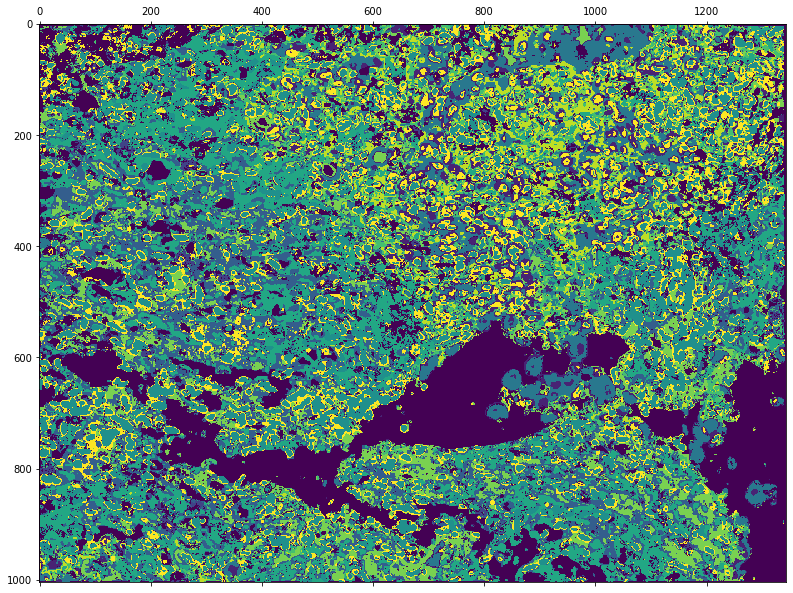

In [305]:
plt.matshow(pred_k10)

ValueError: The palette list has the wrong number of colors.

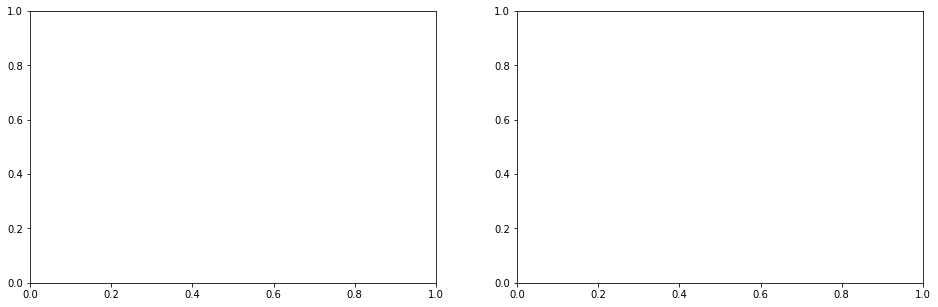

In [300]:
get_kmean_cluster_plot(HH_pdh,pred_k10,N_cluster,cmap_k)

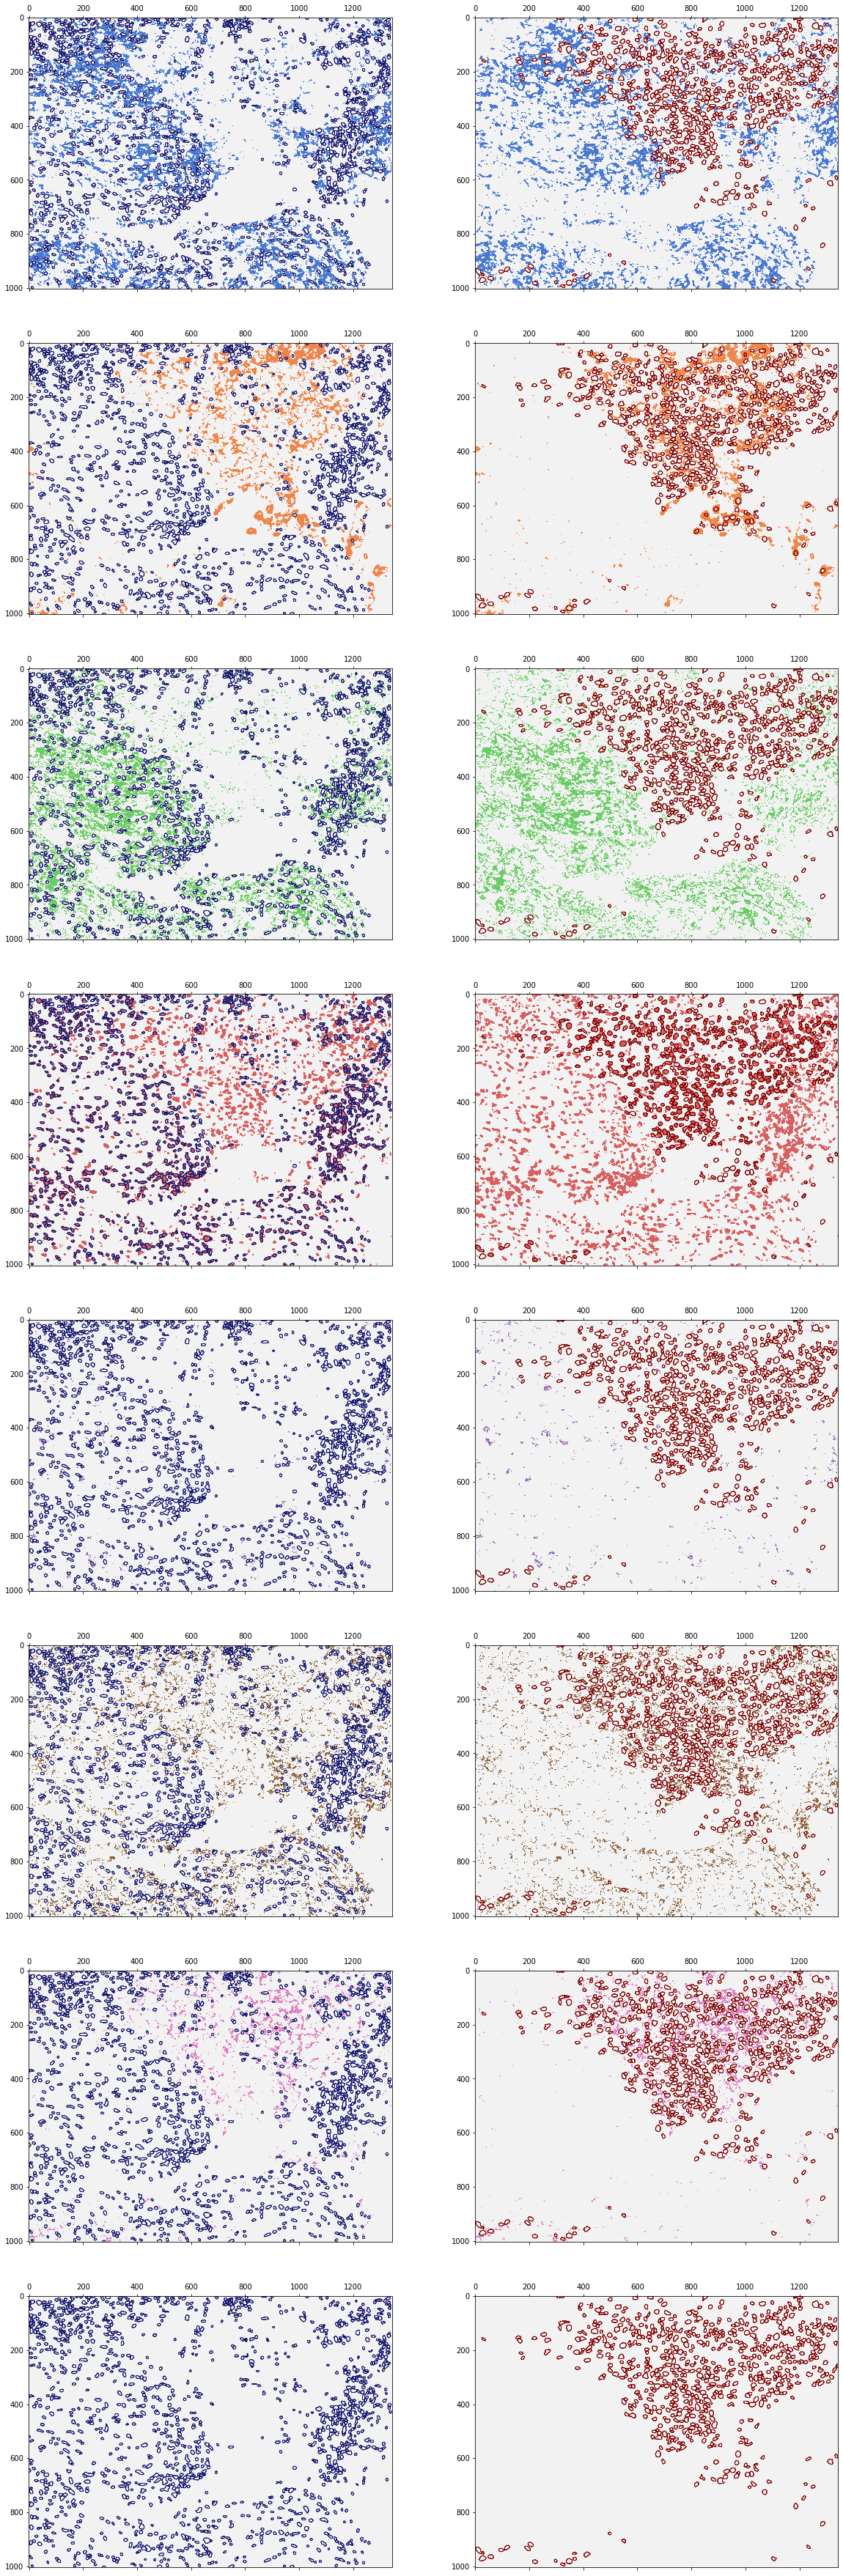

In [297]:
plot_CN_all(pred_k8,list(range(0,N_cluster+1)), l128,l64,cmap_k)

In [258]:
def plot_CN_all(pred,idxs, l128,l64, cmaps):
    f, axs=plt.subplots(len(idxs),2,figsize=(20,8*len(idxs)))
    for ii, (ax0,ax1) in enumerate(axs):
        mat= (pred==idxs[ii])
        ax0.matshow(mat,cmap=ListedColormap([[0.95,0.95,0.95,1], cmaps[ii]]))
        plot_normal(ax=ax0,lbl=l64,c='midnightblue',a=1)
        ax1.matshow(mat,cmap=ListedColormap([[0.95,0.95,0.95,1], cmaps[ii]]))
        plot_cancer(ax=ax1,lbl=l128,c='maroon',a=1)
    return None

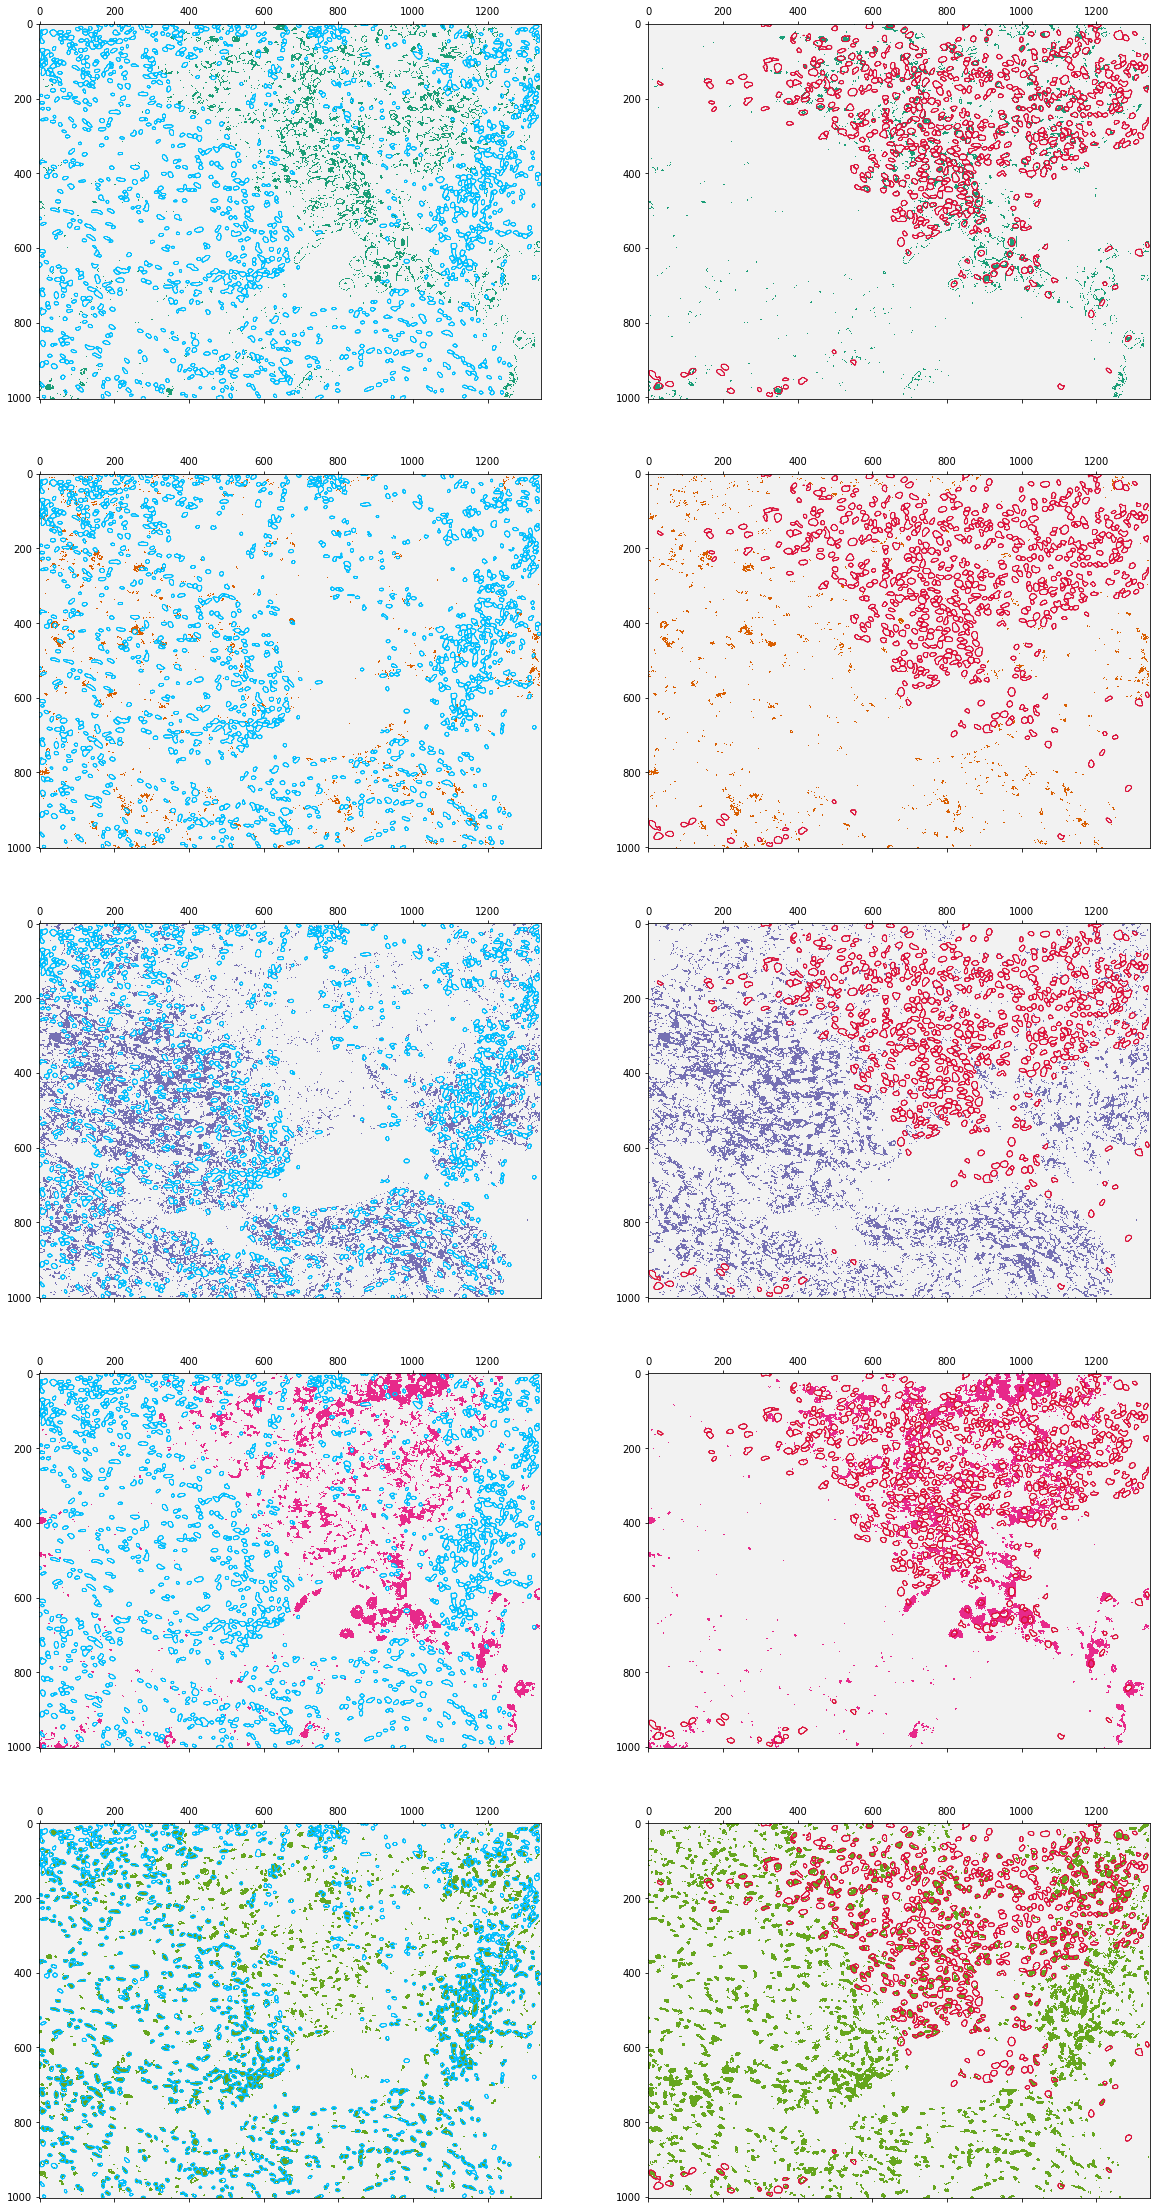

In [19]:
mask26=np.loadtxt(f'{PRETRAIN}/mask{pidx}.txt')

In [88]:
# pred_img=np.loadtxt(f'{PRETRAIN}/pred_img.txt')

In [86]:
# df_pca26=pd.read_csv(f'{PRETRAIN}/df_pca26.csv')

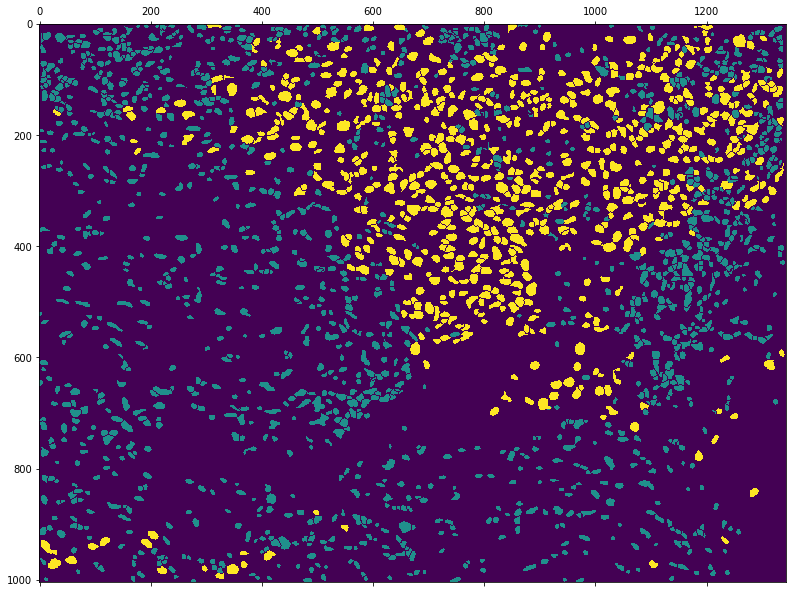

In [24]:
plt.matshow(lbl)

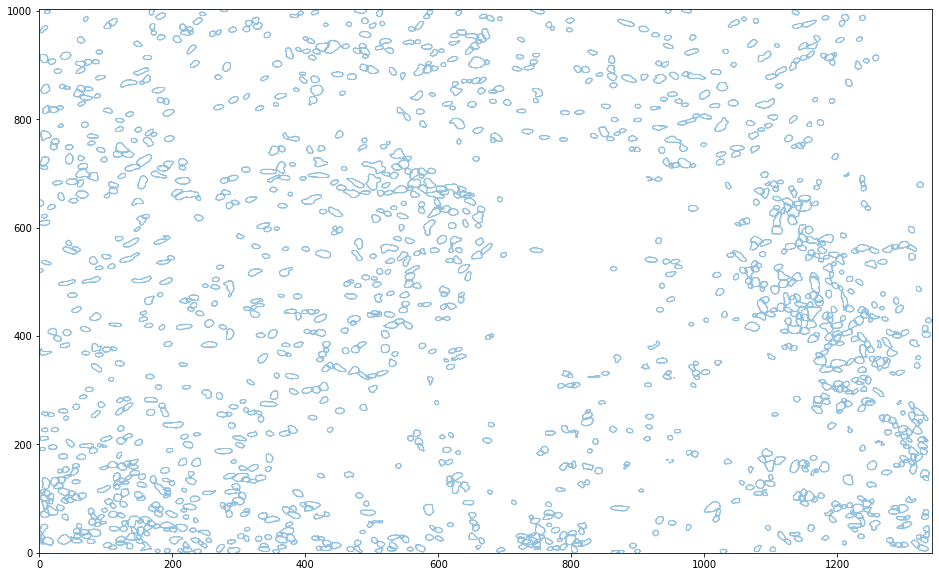

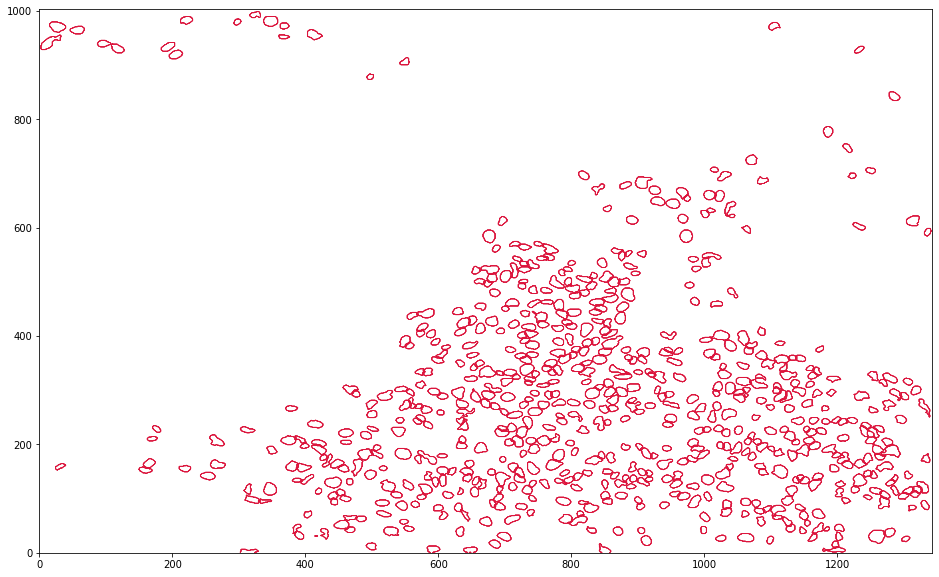

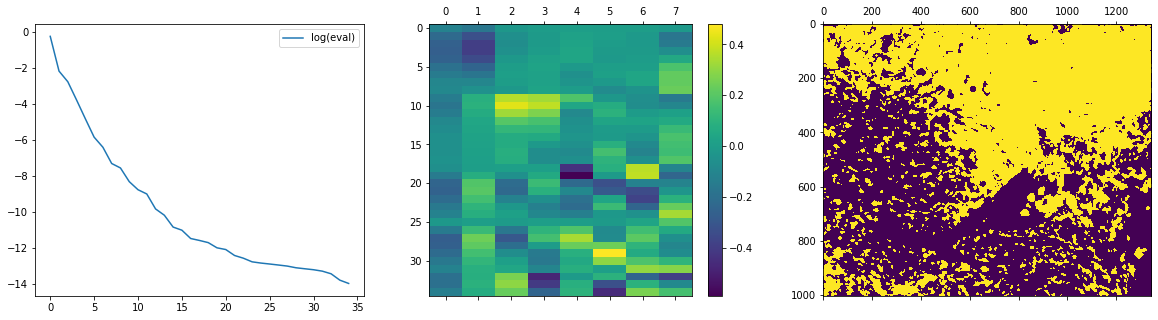

In [178]:
f,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(20,5))
ax0.plot(np.log(s),label='log(eval)')
ax0.legend()
im1=ax1.matshow(pc, aspect='auto')
# ax1.colorbar()
img2=ax2.matshow(mask26,aspect='auto')
plt.colorbar(im1, ax=ax1)
# plt.colorbar(img2, ax=ax2)

TypeError: Invalid shape (1349376,) for image data

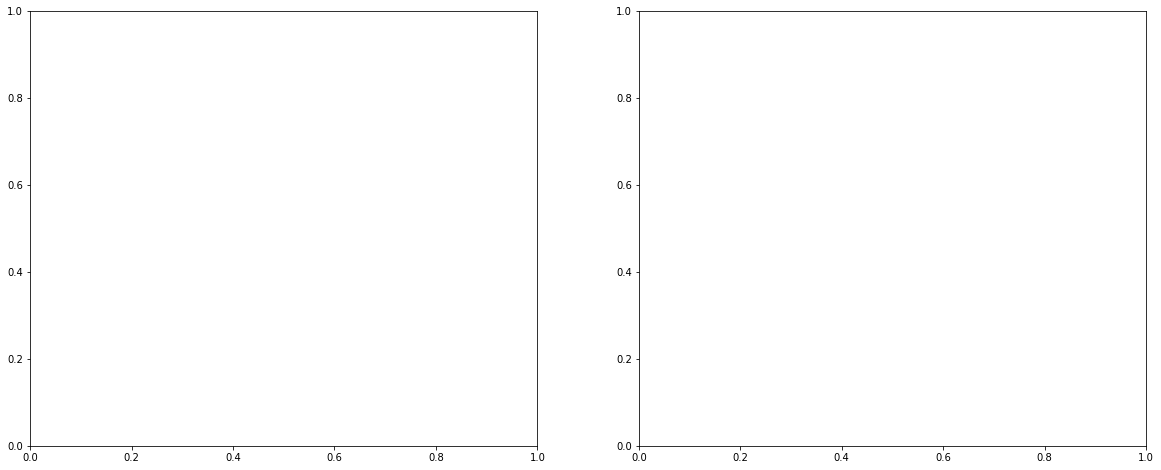

In [31]:
f,(ax0,ax1)=plt.subplots(1,2,figsize=(20,8))
ax0.matshow(mask26,aspect='auto')
ax1.matshow(mask26,aspect='auto')
plot_cancer(ax=ax0)
plot_normal(ax=ax1,c="#92c1e1")

In [12]:
HH_pdc

0     1    2     3     4     5     6     7     8     9  \
0       9.0  11.0  3.0   4.0  13.0  13.0  13.0  13.0  13.0  13.0   
1       8.0  11.0  3.0   4.0  12.0  13.0  13.0  13.0  13.0  13.0   
2      15.0  10.0  1.0  18.0  11.0  13.0  13.0  13.0  13.0  13.0   
3       9.0  11.0  3.0   4.0  12.0  13.0  13.0  13.0  13.0  13.0   
4       8.0  11.0  3.0   4.0  13.0  13.0  13.0  13.0  13.0  13.0   
...     ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
11419  11.0  12.0  1.0   9.0  14.0   9.0  13.0  14.0  13.0  13.0   
11420  14.0  12.0  1.0  17.0  14.0  13.0  13.0  13.0  12.0  13.0   
11421  17.0   9.0  2.0  19.0  11.0  14.0  12.0  12.0  12.0  12.0   
11422  14.0  14.0  3.0  16.0  17.0   6.0  14.0  14.0  13.0  12.0   
11423  16.0  12.0  1.0  18.0  14.0  14.0  13.0  12.0  12.0  13.0   

                 HH     freq        u1        u2  k6  k8  m4  
0      1.644186e+13  23468.0  9.604334 -4.651105   5   4   4  
1      1.644186e+13  21470.0  9.760013 -4.546504   5   4   4  
2      1.644186e+13  17111.0 -5.935594  2.919089   6   3   3  
3      1.644186e+13  17072.0  9.743988 -4.632646   5   4   4  
4      1.644186e+13  16175.0  9.646929 -4.498602   5   4   4  
...             ...      ...       ...       ...  ..  ..  ..  
11419  1.644433e+13    235.0  5.897732 -3.410820   1   6   1  
11420  1.638698e+13    235.0 -7.224735 -0.443837   2   5   2  
11421  1.517711e+13    235.0 -6.423453  4.186670   6   3   3  
11422  1.523716e+13    235.0 -5.767558 -5.890290   3   1   1  
11423  1.638449e+13    235.0 -7.313347 -0.062844   2   5   2  

[11424 rows x 17 columns]

In [18]:
ukeys=[f'{ii}' for ii in range(10)]

In [20]:
ukeys+['m4']

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'm4']

In [22]:
HH_plot=HH_pdc[ukeys+['m4']]

In [ ]:
g = sns.PairGrid(norm_pd1k,hue='h3')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=4);

In [ ]:
sns.kdeplot()

KeyboardInterrupt: 

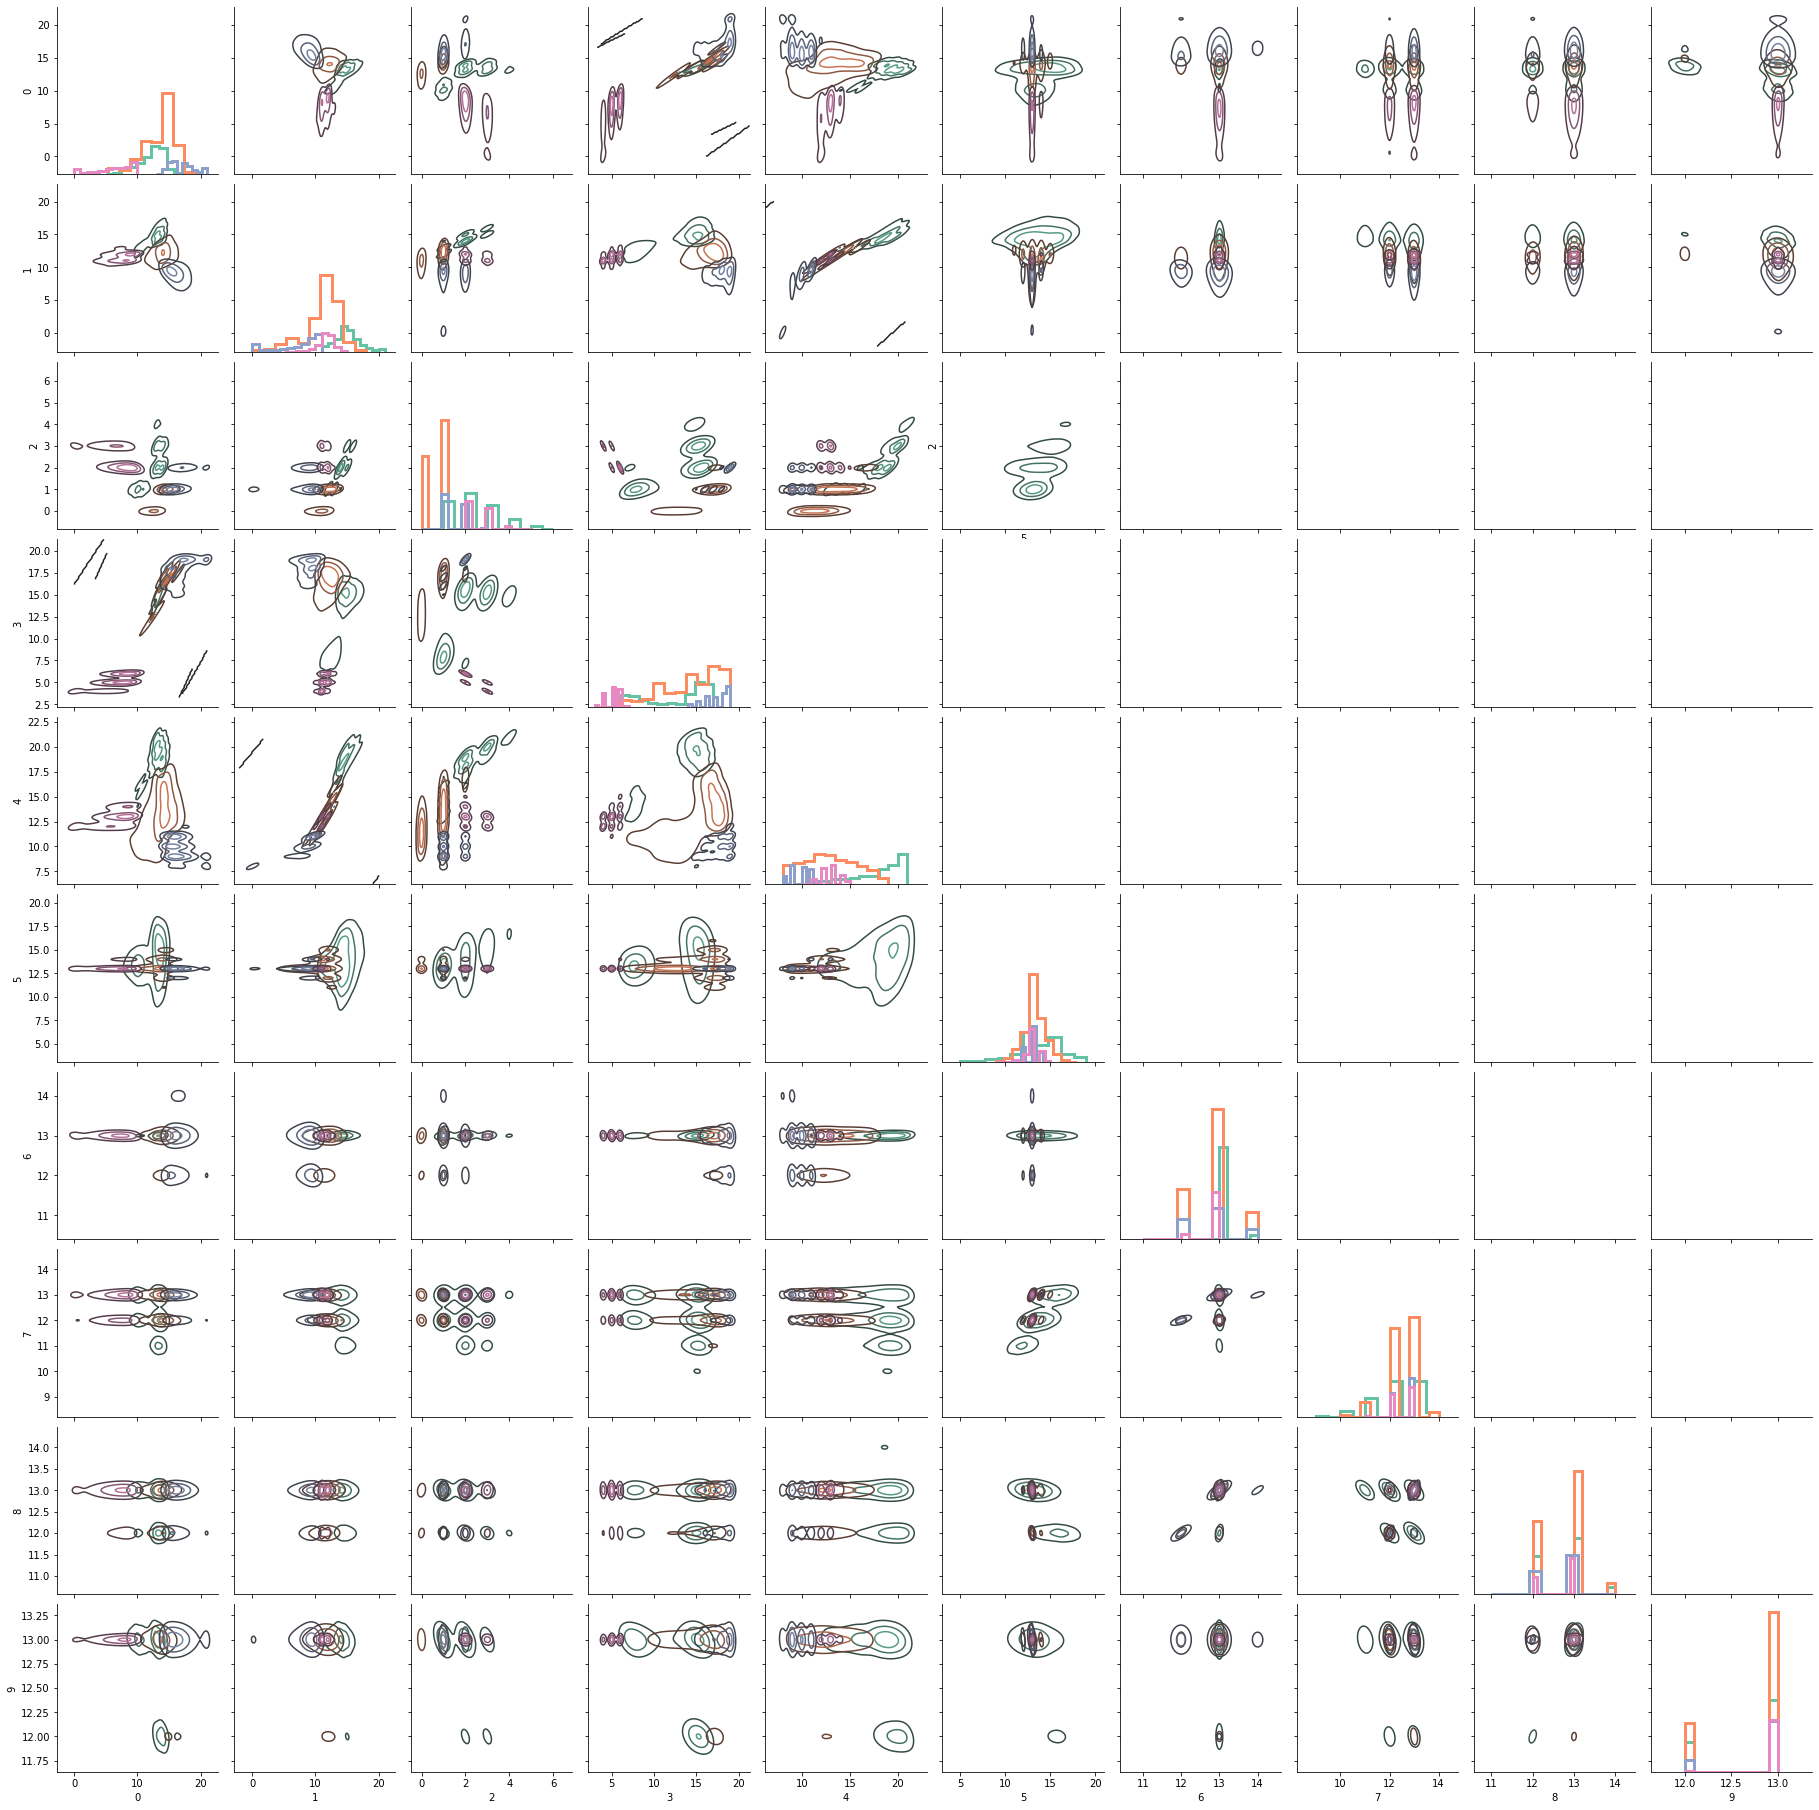

In [23]:
# pcag = sns.PairGrid(HH_pdc,hue='m4',palette="Set2",
#                  hue_kws={"marker": ["o", "s", "D"]})
pcag = sns.PairGrid(HH_plot,hue='m4',palette="Set2")
pcag.map_diag(plt.hist,histtype="step", linewidth=3)
pcag.map_offdiag(sns.kdeplot, n_levels=3);

In [98]:
mask26

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
label1D=lbl[mask26.astype(bool)].flatten()

In [153]:
df_pca26['lbl']=label1D

In [152]:
lblt_dict={0:'NN',128:'TN',64:'NTN'}

In [154]:
df_pca26['lbl']=df_pca26['lbl'].apply(lambda x: lblt_dict[x])

In [155]:
color_pc=df_pca26[ukeys[:4]+['lbl']]

In [158]:
HH_pc=HH_pdc[ukeys[:4]+['lbl']]

In [156]:
lbl_dict={1:'NN',2:'TN',3:'NTN',4:'MPH'}

In [157]:
HH_pdc['lbl']=HH_pdc['m4'].apply(lambda x:lbl_dict[x] )

In [159]:
color_pct=color_pc.sample(2000)

In [ ]:
df_pca26

In [180]:
# sns.pairplot(color_pct, hue="lbl",palette="muted",plot_kws={"s": 30},kind='kde');

In [182]:
color_pct

0         1         2         3  lbl
115441  0.562607  0.732279  0.561270  0.895498   NN
3822    0.000000  0.000000  0.833500  0.414471   NN
7476    0.894095  0.741807  0.479156  0.595248   NN
388429  0.977574  0.487649  0.608734  0.675720   NN
557129  0.387446  0.883821  0.099846  0.685028   TN
...          ...       ...       ...       ...  ...
328146  0.791261  0.415254  0.618229  0.840048   TN
379902  0.930227  0.660432  0.632276  0.801790   NN
613935  1.000000  0.447616  0.536843  0.650496  NTN
614390  1.000000  0.614143  0.754996  0.877893   NN
262348  0.900612  0.605876  0.622891  0.769093   NN

[2000 rows x 5 columns]

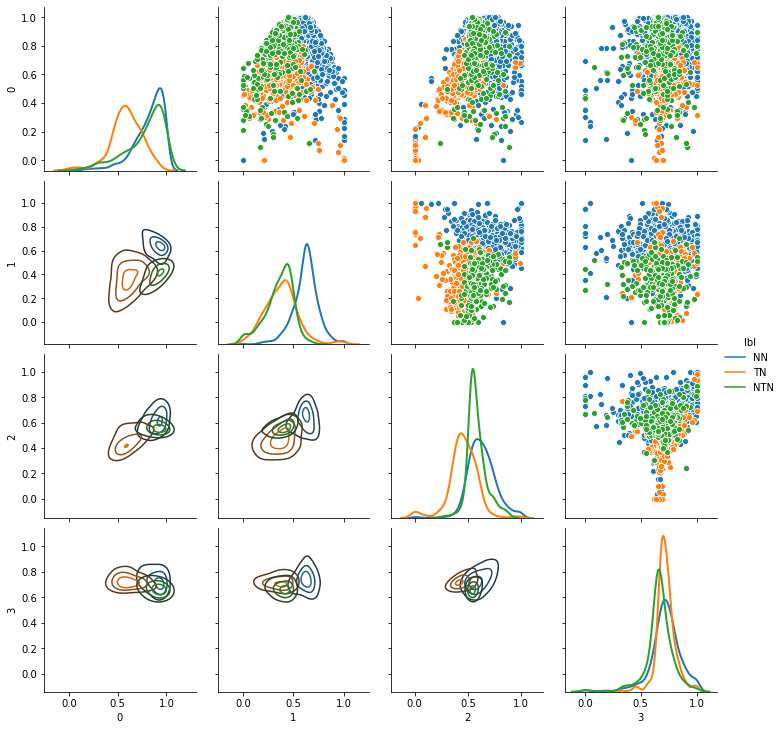

In [189]:
g = sns.PairGrid(color_pct,hue="lbl")
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot,n_levels=3)
g = g.map_diag(sns.kdeplot, lw=2 )
g.add_legend()

In [190]:
HH_pc

0     1    2     3  lbl
0       9.0  11.0  3.0   4.0  MPH
1       8.0  11.0  3.0   4.0  MPH
2      15.0  10.0  1.0  18.0  NTN
3       9.0  11.0  3.0   4.0  MPH
4       8.0  11.0  3.0   4.0  MPH
...     ...   ...  ...   ...  ...
11419  11.0  12.0  1.0   9.0   NN
11420  14.0  12.0  1.0  17.0   TN
11421  17.0   9.0  2.0  19.0  NTN
11422  14.0  14.0  3.0  16.0   NN
11423  16.0  12.0  1.0  18.0   TN

[11424 rows x 5 columns]

In [198]:
HH_pdc

0     1    2     3     4     5     6     7     8     9  \
0       9.0  11.0  3.0   4.0  13.0  13.0  13.0  13.0  13.0  13.0   
1       8.0  11.0  3.0   4.0  12.0  13.0  13.0  13.0  13.0  13.0   
2      15.0  10.0  1.0  18.0  11.0  13.0  13.0  13.0  13.0  13.0   
3       9.0  11.0  3.0   4.0  12.0  13.0  13.0  13.0  13.0  13.0   
4       8.0  11.0  3.0   4.0  13.0  13.0  13.0  13.0  13.0  13.0   
...     ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
11419  11.0  12.0  1.0   9.0  14.0   9.0  13.0  14.0  13.0  13.0   
11420  14.0  12.0  1.0  17.0  14.0  13.0  13.0  13.0  12.0  13.0   
11421  17.0   9.0  2.0  19.0  11.0  14.0  12.0  12.0  12.0  12.0   
11422  14.0  14.0  3.0  16.0  17.0   6.0  14.0  14.0  13.0  12.0   
11423  16.0  12.0  1.0  18.0  14.0  14.0  13.0  12.0  12.0  13.0   

                 HH     freq        u1        u2  k6  k8  m4  lbl  
0      1.644186e+13  23468.0  9.604334 -4.651105   5   4   4  MPH  
1      1.644186e+13  21470.0  9.760013 -4.546504   5   4   4  MPH  
2      1.644186e+13  17111.0 -5.935594  2.919089   6   3   3  NTN  
3      1.644186e+13  17072.0  9.743988 -4.632646   5   4   4  MPH  
4      1.644186e+13  16175.0  9.646929 -4.498602   5   4   4  MPH  
...             ...      ...       ...       ...  ..  ..  ..  ...  
11419  1.644433e+13    235.0  5.897732 -3.410820   1   6   1   NN  
11420  1.638698e+13    235.0 -7.224735 -0.443837   2   5   2   TN  
11421  1.517711e+13    235.0 -6.423453  4.186670   6   3   3  NTN  
11422  1.523716e+13    235.0 -5.767558 -5.890290   3   1   1   NN  
11423  1.638449e+13    235.0 -7.313347 -0.062844   2   5   2   TN  

[11424 rows x 18 columns]

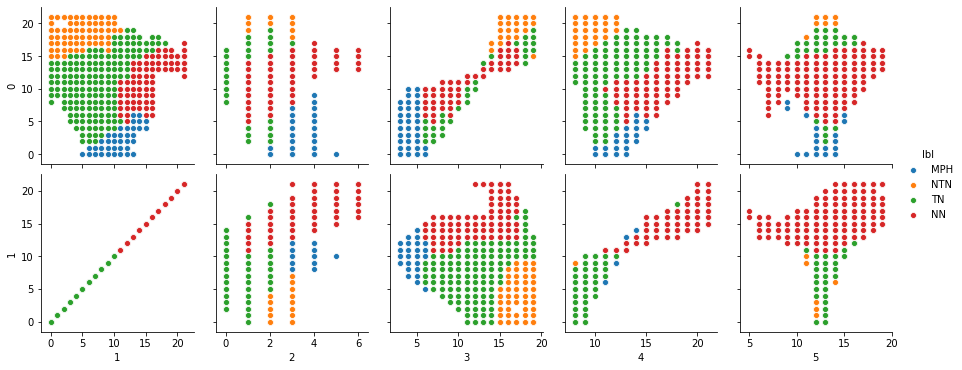

In [203]:
g = sns.PairGrid(HH_pdc,
                 x_vars=['1','2','3','4','5'],
                 y_vars=['0','1'], hue='lbl')
g = g.map(sns.scatterplot)
g.add_legend()

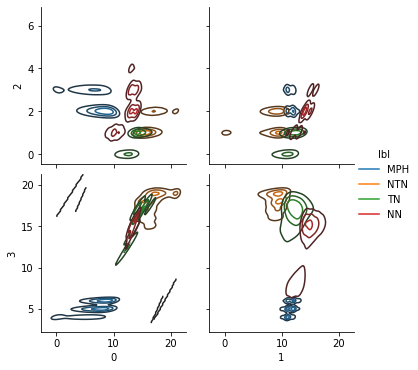

In [194]:
g = sns.PairGrid(HH_pc,
                 x_vars=["0", "1"],
                 y_vars=["2", "3"], hue='lbl')
g = g.map(sns.scatterplot, n_levels=3)
g.add_legend()

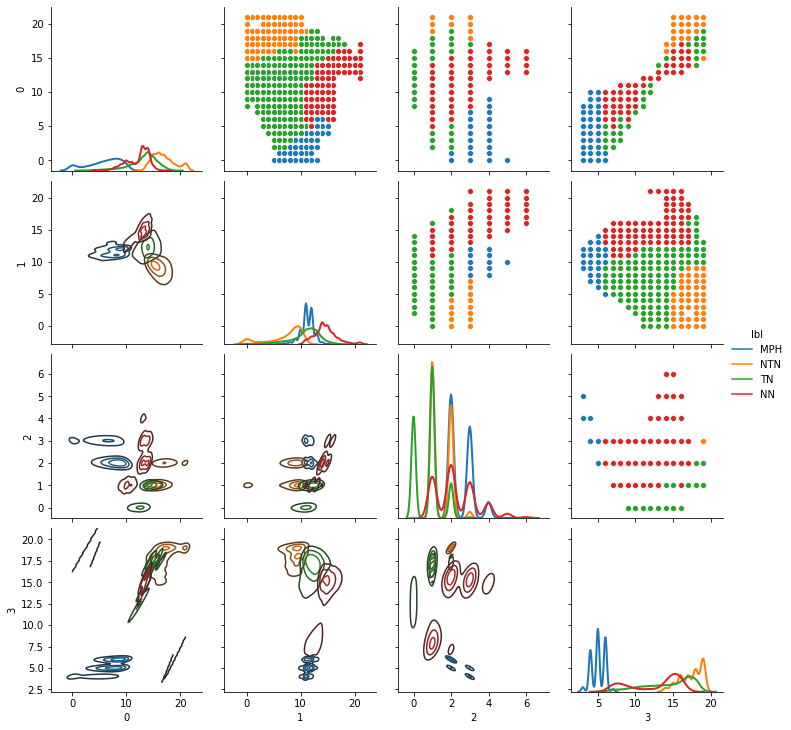

In [188]:
g = sns.PairGrid(HH_pc,hue="lbl")
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot,n_levels=3)
g = g.map_diag(sns.kdeplot, lw=2 )
g.add_legend()

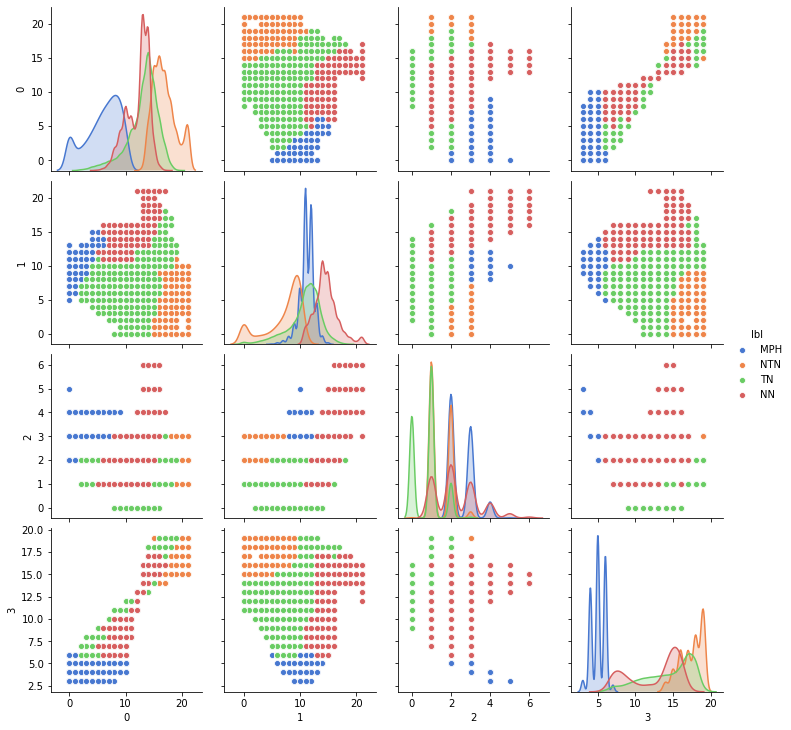

In [161]:
sns.pairplot(HH_pc, hue="lbl",palette="muted");

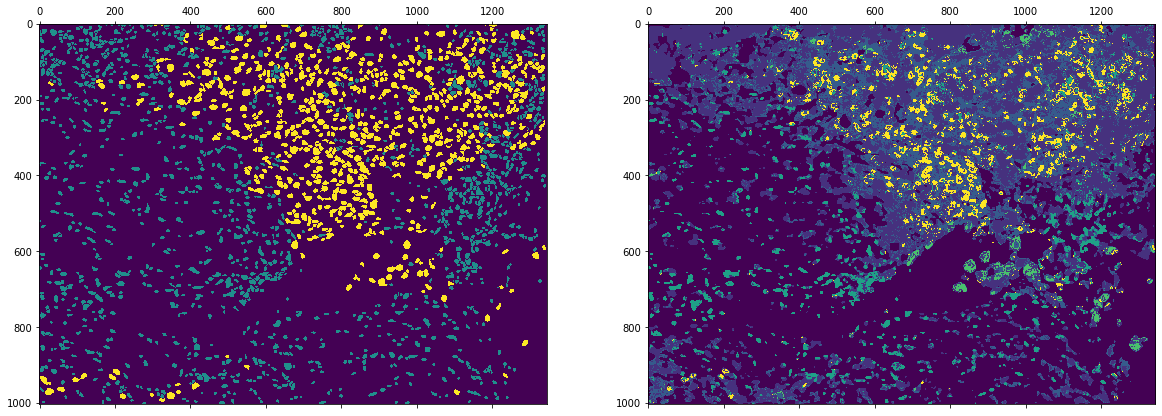

In [94]:
f,(ax0,ax1)=plt.subplots(1,2,figsize=(20,7))
ax0.matshow(lbl,aspect='auto')
ax1.matshow(pred_img,aspect='auto')

In [123]:
HH_pdc

0     1    2     3     4     5     6     7     8     9  \
0       9.0  11.0  3.0   4.0  13.0  13.0  13.0  13.0  13.0  13.0   
1       8.0  11.0  3.0   4.0  12.0  13.0  13.0  13.0  13.0  13.0   
2      15.0  10.0  1.0  18.0  11.0  13.0  13.0  13.0  13.0  13.0   
3       9.0  11.0  3.0   4.0  12.0  13.0  13.0  13.0  13.0  13.0   
4       8.0  11.0  3.0   4.0  13.0  13.0  13.0  13.0  13.0  13.0   
...     ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
11419  11.0  12.0  1.0   9.0  14.0   9.0  13.0  14.0  13.0  13.0   
11420  14.0  12.0  1.0  17.0  14.0  13.0  13.0  13.0  12.0  13.0   
11421  17.0   9.0  2.0  19.0  11.0  14.0  12.0  12.0  12.0  12.0   
11422  14.0  14.0  3.0  16.0  17.0   6.0  14.0  14.0  13.0  12.0   
11423  16.0  12.0  1.0  18.0  14.0  14.0  13.0  12.0  12.0  13.0   

                 HH     freq        u1        u2  k6  k8  m4     lbl  
0      1.644186e+13  23468.0  9.604334 -4.651105   5   4   4       P  
1      1.644186e+13  21470.0  9.760013 -4.546504   5   4   4       P  
2      1.644186e+13  17111.0 -5.935594  2.919089   6   3   3  Immune  
3      1.644186e+13  17072.0  9.743988 -4.632646   5   4   4       P  
4      1.644186e+13  16175.0  9.646929 -4.498602   5   4   4       P  
...             ...      ...       ...       ...  ..  ..  ..     ...  
11419  1.644433e+13    235.0  5.897732 -3.410820   1   6   1     Bnd  
11420  1.638698e+13    235.0 -7.224735 -0.443837   2   5   2   Tumor  
11421  1.517711e+13    235.0 -6.423453  4.186670   6   3   3  Immune  
11422  1.523716e+13    235.0 -5.767558 -5.890290   3   1   1     Bnd  
11423  1.638449e+13    235.0 -7.313347 -0.062844   2   5   2   Tumor  

[11424 rows x 18 columns]

In [165]:
HH_N=16866305

In [166]:
freq_N/HH_N

0.4469204725042029

In [163]:
freq_N=sum(HH_pdc['freq'])

In [124]:
lw=HH_pdc['freq']/HH_pdc['freq'][0]

In [170]:
HH_pdc['m4']

0        4
1        4
2        3
3        4
4        4
        ..
11419    1
11420    2
11421    3
11422    1
11423    2
Name: m4, Length: 11424, dtype: int64

In [ ]:
ax2.scatter(HH_pdc['u1'],HH_pdc['u2'],s=lw**2*100, c=HH_pdc['m4'])

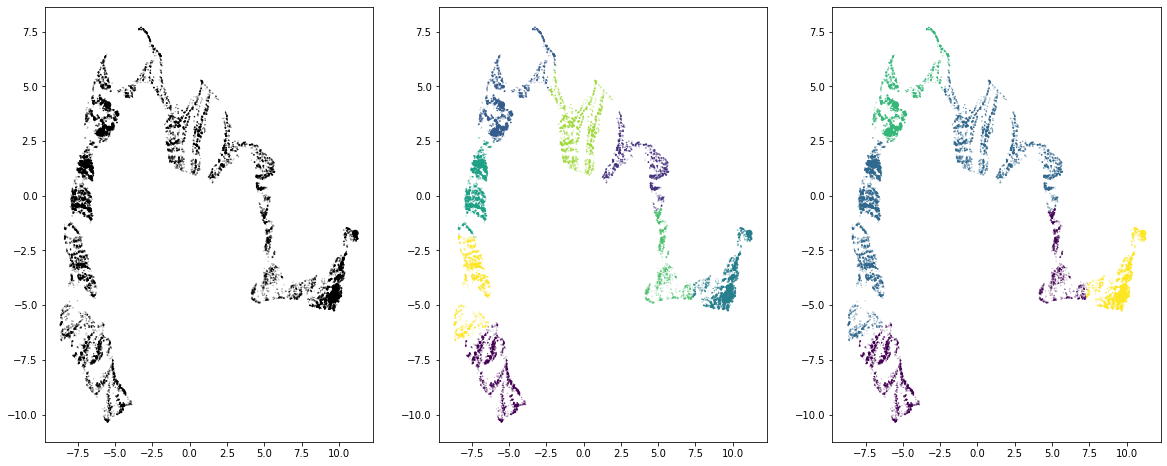

In [126]:
f, (ax0,ax1,ax2)=plt.subplots(1,3,figsize=(20,8))
ax0.scatter(HH_pdc['u1'],HH_pdc['u2'],s=lw**2*100, c='k')
ax1.scatter(HH_pdc['u1'],HH_pdc['u2'],s=lw**2*100, c=HH_pdc['k8'])
# sns.scatterplot('u1','u2',data=HH_pdc, hue='k3',ax=ax2,palette="viridis")
ax2.scatter(HH_pdc['u1'],HH_pdc['u2'],s=lw**2*100, c=HH_pdc['m4'])

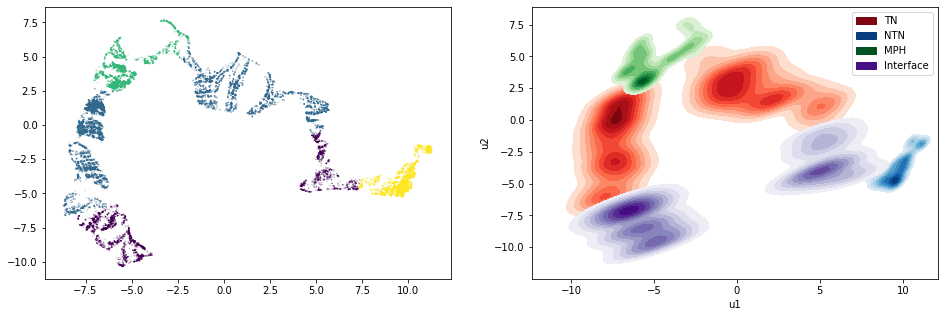

In [169]:
f,(ax0,ax1)=plt.subplots(1,2,figsize=(16,5))
ax0.scatter(HH_pdc['u1'],HH_pdc['u2'],s=lw**2*100, c=HH_pdc['m4'])
ax1 = sns.kdeplot(HH_pdc[HH_pdc['m4']==2]['u1'],HH_pdc[HH_pdc['m4']==2]['u2'],
                 cmap="Reds", shade=True, shade_lowest=False,label='TN')
ax1 = sns.kdeplot(HH_pdc[HH_pdc['m4']==4]['u1'],HH_pdc[HH_pdc['m4']==4]['u2'],
                 cmap="Blues", shade=True, shade_lowest=False,label='NTN')
ax1 = sns.kdeplot(HH_pdc[HH_pdc['m4']==3]['u1'],HH_pdc[HH_pdc['m4']==3]['u2'],
                 cmap="Greens", shade=True, shade_lowest=False,label='MPH')
ax1 = sns.kdeplot(HH_pdc[HH_pdc['m4']==1]['u1'],HH_pdc[HH_pdc['m4']==1]['u2'],
                 cmap="Purples", shade=True, shade_lowest=False,label='Interface')
ax1.legend()